### Set up environment

In [1]:
import os

import lateral_signaling as lsig
import numpy as np
import pandas as pd
from tqdm import tqdm
import numba

import scipy.stats as st
from scipy.spatial import Voronoi
from scipy.sparse import csr_matrix

import holoviews as hv
import colorcet as cc
hv.extension("matplotlib")

import matplotlib.pyplot as plt
%matplotlib inline

import bebi103
# import bokeh_catplot
import iqplot
import bokeh.io
bokeh.io.output_notebook()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

C:\Users\Pranav\Anaconda3\lib\site-packages\bebi103\viz.py:16: UserWarning: Could not import ArviZ. Perhaps it is not installed. Some functionality in the viz submodule will not be available.
  "Could not import ArviZ. Perhaps it is not installed."
C:\Users\Pranav\Anaconda3\lib\site-packages\bebi103\viz.py:40: UserWarning: DataShader import failed with error "No module named 'datashader.reductions'".
Features requiring DataShader will not work and you will get exceptions.
  Features requiring DataShader will not work and you will get exceptions."""
C:\Users\Pranav\Anaconda3\lib\site-packages\bebi103\viz.py:50: UserWarning: Could not import `stan` submodule. Perhaps pystan or cmdstanpy is not properly installed.
  "Could not import `stan` submodule. Perhaps pystan or cmdstanpy is not properly installed."
C:\Users\Pranav\Anaconda3\lib\site-packages\bebi103\__init__.py:43: UserWarning: Could not import `stan` submodule. Perhaps ArviZ or PyStan or CmdStanPy is/are not properly installed.
 

Loading BokehJS ...

In [2]:
%load_ext blackcellmagic

<hr>

### Plotting utils

In [3]:
def ecdf(vals):
    vals = np.sort(vals)
    ecdf = np.arange(1, vals.size + 1) / vals.size

    return hv.Points((vals, ecdf))

def remove_RB_spines(plot, element):
    plot.state.axes[0].spines["right"].set_visible(False)
    plot.state.axes[0].spines["bottom"].set_visible(False)
    
def remove_RT_spines(plot, element):
    plot.state.axes[0].spines["right"].set_visible(False)
    plot.state.axes[0].spines["top"].set_visible(False)

### Metrics for activation behavior

In [4]:
@numba.njit
def is_monotonic(arr):
    return not np.any(np.diff(arr) < 0)

In [5]:
@numba.njit
def is_biphasic(arr, pct_thresh):
    return (np.diff(arr > pct_thresh) != 0).sum() > 1

In [6]:
@numba.njit
def is_propagated(arr, pct_thresh):
    return np.any(arr > pct_thresh)

### Functions to approximate critical values of phase boundary

In [7]:
@numba.njit
def rho_crit_approx(g, a=3.1, b=4.1):
    return a - b * np.log10(g)

In [8]:
@numba.njit
def t_crit_approx(g, rho_0, rho_max, *rho_crit_args):
    rho_crit = rho_crit_approx(g, *rho_crit_args)
    return -1/g * np.log((rho_max - rho_crit) / rho_crit * rho_0 / (rho_max - rho_0) )

In [9]:
@numba.njit
def t_crit_approx_levelset(t_crit, g, rho_max, *rho_crit_args):
    rho_crit = rho_crit_approx(g, *rho_crit_args)
    return rho_max * rho_crit / (rho_crit + (rho_max - rho_crit) * np.exp(g * t_crit))

In [10]:
@numba.njit
def t_crit_approx_nodilution(g, rho_0, rho_max, rho_crit):
    return -1/g * np.log((rho_max - rho_crit) / rho_crit * rho_0 / (rho_max - rho_0) )

In [11]:
@numba.njit
def t_crit_approx_levelset_nodilution(t_crit, g, rho_max, rho_crit):
    return rho_max * rho_crit / (rho_crit + (rho_max - rho_crit) * np.exp(g * t_crit))

## Read in data from HPC runs

In [12]:
from glob import glob
import os

In [13]:
data_dir = "HPC_data"
glob(data_dir + "/*")

['HPC_data\\20210407_sweep_TCphase_dense',
 'HPC_data\\20210415_sweep_TCphase_dense_ling',
 'HPC_data\\20210415_sweep_TCphase_dense_log2g',
 'HPC_data\\20210426_sweep_TCphase_dense_ling_nodilution']

<hr>

## Dilution rate unaffected by growth rate

### Read in data (linear sampling of `g`)

In [14]:
run_name = "20210426_sweep_TCphase_dense_ling_nodilution"

In [15]:
data_regexp = os.path.join(data_dir, run_name, "*_results.npz")
data_path = [os.path.abspath(f) for f in glob(data_regexp)]

if len(data_path) == 0:
    print("Could not find data with regexp {}".format(os.path.abspath(data_regexp)))
elif len(data_path) > 1:
    print("More than one file matching regexp {}".format(os.path.abspath(data_regexp)))
    print("Matching files:")
    print(data_path)

In [16]:
# Read data
data_file = data_path[0]
npz = np.load(data_file)

# Unpack variables
n = npz["n"]
t = npz["t"]
random_seeds = npz["random_seeds"]
sender_idx_rep = npz["sender_idx_rep"]
param_names = npz["param_names"]
param_space = npz["param_space"]
# S_actnum_param_constant = npz["S_actnum_param_constant"]
# S_tcmean_param_constant = npz["S_tcmean_param_constant"]
S_actnum_param = npz["S_actnum_param"]
S_tcmean_param = npz["S_tcmean_param"]

# Get parmaeter sampling values
rep_space     = np.sort(np.unique(param_space[:, 0].astype(int)))
g_space       = np.sort(np.unique(param_space[:, 1]))
rho_0_space   = np.sort(np.unique(param_space[:, 2]))
rho_max_space = np.sort(np.unique(param_space[:, 3]))

# Get number of runs sampled
n_runs = param_space.shape[0]
n_reps = rep_space.size
n_sets = n_runs // n_reps

# Store run metadata in DataFrame object
S_prop_df = pd.DataFrame(param_space, columns=param_names)
S_prop_df = S_prop_df.reset_index()
S_prop_df.rep = S_prop_df.rep.astype(int)

# Group runs by replicate
S_prop_rep_grp = S_prop_df.groupby(list(param_names[1:]))["index"]
S_prop_rep_grp = list(S_prop_rep_grp)

# Get sample numbers of each replicate set
S_prop_rep_idx = np.empty((n_sets, n_reps), dtype=int)
for i in range(n_runs // n_reps):
    S_prop_rep_idx[i] = S_prop_rep_grp[i][1].values

# Get parameters in each replicate set, preserving order 
param_space_agg = param_space[S_prop_rep_idx[:, 0], 1:]

In [17]:
print("Unpacked variables:", *list(npz.keys()), sep="\n\t")
print()
print(
    "Number of runs:",
    "{0} ({1} sets of {2} replicates)".format(n_runs, n_sets, n_reps),
    sep="\n\t",
)
print()
print("Parameters scanned:")
print(*["\t" + pn for pn in param_names])

Unpacked variables:
	n
	t
	random_seeds
	sender_idx_rep
	param_names
	param_space
	S_actnum_param
	S_tcmean_param

Number of runs:
	72000 (14400 sets of 5 replicates)

Parameters scanned:
	rep 	g 	rho_0 	rho_max


In [18]:
# Number of activated cells (mean of n = n_reps)
S_actnum_mean = S_actnum_param[S_prop_rep_idx, :].mean(axis=1)

# Mean fluorescence (mean of n = n_reps)
S_tcmean_mean = S_tcmean_param[S_prop_rep_idx, :].mean(axis=1)

# % of cells activated
S_prop_param = S_actnum_param / n
S_prop_mean = S_actnum_mean / n

In [19]:
# Threshold for phase behavior
phase_thresh = 0.05   #  % activated cells

# n_runs = S_prop_param.shape[0]

# Calculate phase behavior
iterator = range(n_runs)
# iterator = tqdm(iterator)
S_prop_bool = np.zeros((n_runs,), dtype=bool)
S_biph_bool = np.zeros((n_runs,), dtype=bool)

for i in iterator:
    S_prop_bool[i] = is_propagated(S_prop_param[i], phase_thresh)
    S_biph_bool[i] = is_biphasic(S_prop_param[i], phase_thresh)
#     monotonicity = np.array([is_monotonic(s) for s in S_prop_param])

In [20]:
# Average phase behavior over replicates
S_prop_pct = S_prop_bool[S_prop_rep_idx].mean(axis=1)
S_biph_pct = S_biph_bool[S_prop_rep_idx].mean(axis=1)

# If any replicates show behavior, set True
S_prop_bool_agg = np.any(S_prop_bool[S_prop_rep_idx], axis=1)
S_biph_bool_agg = np.any(S_biph_bool[S_prop_rep_idx], axis=1)

# Convert to phase
#   0 = no propagation, 1 = propagation, 2 = biphasic
phase_behavior = (1 + S_biph_bool_agg) * S_prop_bool_agg

__Visualize distribution of mean TC fluorescence at end of sampling time__

In [21]:
# p = iqplot.ecdf()
# bokeh.io.show(p)

In [22]:
dS_dt_init_mean = (S_tcmean_mean[:, 1] - S_tcmean_mean[:, 0]) / (t[1] - t[0])

:Points   [x,y]
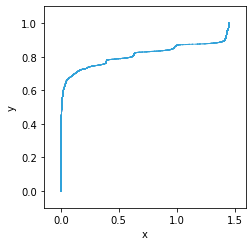

In [23]:
p = ecdf(S_tcmean_mean[:, -1])
p.opts(s=1)

:Points   [x,y]
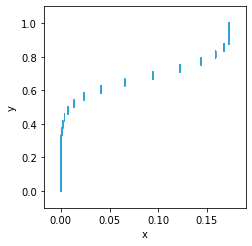

In [24]:
p = ecdf(dS_dt_init_mean)
p.opts(s=1)

In [25]:
init_thresh = 0.05
init_behavior = (dS_dt_init_mean > init_thresh).astype(int)
# end_behavior = (S_tcmean_mean[:, -1] > phase_thresh).astype(int)
end_behavior = (S_tcmean_mean[:, -1] > phase_thresh).astype(int)

In [26]:
# dS_dt_init_mean[np.logical_and(end_behavior.astype(bool), which_growing)].min()

In [27]:
# param_space_agg[np.logical_and((init_behavior - end_behavior) < 0, which_growing)]

In [28]:
phase_behavior_new = end_behavior + 2 * (1 - end_behavior) * init_behavior

### Find critical density

In [29]:
where_static_density = param_space_agg[:, 2] == param_space_agg[:, 1]

rho_boundary_vals = param_space_agg[
    np.logical_and(where_static_density, phase_behavior_new == 2), 1
]
print("Along boundary:")
print("mean density         =", f"{rho_boundary_vals.mean()}")
print("std. dev. of density =", f"{rho_boundary_vals.std()}")

Along boundary:
mean density         = 3.0
std. dev. of density = 0.0


In [30]:
rho_crit_approx_nodilution = rho_boundary_vals.mean()
# rho_crit_approx_nodilution = param_space_agg[
#     np.logical_and(
#         where_static_density, param_space_agg[:, 1] < rho_boundary_vals.mean()
#     ),
#     1,
# ].max()

In [31]:
approx_bound = rho_crit_approx_nodilution

## Plot phase diagram with `t_crit` level sets

In [32]:
save_figs = False

In [33]:
param_space_3d = param_space_agg.copy()
# param_space_3d[:, 0] = np.log2(param_space_3d[:, 0])
# param_space_3d[:, 2] = param_space_3d[:, 2] - param_space_3d[:, 1]
which_growing = param_space_3d[:, 2] >= param_space_3d[:, 1]

In [34]:
phase_clrs = np.array([*cc.glasbey_warm])[phase_behavior_new]

In [35]:
# t_crit = 5
# rho_max_ls = np.linspace(1, 8, 50)
# log10g_ls = np.linspace(-1, 0.75, 50)

# X, Y = np.meshgrid(log10g_ls, rho_max_ls)
# rho_crit_ls = rho_crit_approx(10**X)
# Z = t_crit_approx_levelset(t_crit, 10**X, Y)

# tol = 1e-5
# valid_samples = np.logical_and(Y - rho_crit_ls >= -tol, rho_crit_ls - Z >= -tol)

# xx, yy, zz = X[valid_samples], Y[valid_samples], Z[valid_samples]

In [36]:
n_samples = 50
tol = 1e-5

In [37]:
def plot_3d_phase_boundaries_lin_nodilution(
    t_crits, n_samples=50, tol=1e-5, dpi=150, azim=300, elev=20
):

    rho_max_ls = np.linspace(1, 8, n_samples)
    ling_ls = np.linspace(0.25, 2.25, n_samples)

    X, Y = np.meshgrid(ling_ls, rho_max_ls)
    rho_crit_ls = rho_crit_approx_nodilution * np.ones_like(X)

    rho_crit_ls = t_crit_approx_levelset_nodilution(0, X, Y, rho_crit_approx_nodilution)
    valid_samples = Y - rho_crit_ls >= -tol
    xx, yy = X[valid_samples].flatten(), Y[valid_samples].flatten()

    fig = plt.figure(figsize=(4, 4))
    ax = plt.axes(projection="3d")
    ax.azim = azim
    ax.elev = elev

    # ax.contour3D(X, Y, Z, 50, cmap='binary')
    ax.set_xlabel(r"$g$")
#     ax.set_xticks([0.5, 1, 1.5, 2])
#     ax.set_xticklabels([r"$0.5$", r"$1$", r"$1.5$", r"$2$"])
    ax.set_ylabel(r"$\rho_{max}$")
    ax.set_yticks([0, 2, 4, 6, 8])
    ax.set_ylim3d([0, 8])
    ax.set_zlabel(r"$\rho_0$")
    ax.set_zticks([0, 2, 4, 6, 8])
    ax.set_zlim3d([0, 8])
    ax.scatter(
        *param_space_3d[which_growing].T[np.array([0, 2, 1])],
        c=phase_clrs[which_growing],
        s=170,
        marker="s",
        alpha=0.01,
        linewidth=0,
    )
    ax.set_title(r"$t_{crit} =$ " + ", ".join([str(i) for i in t_crits]))

    for i, tc in enumerate(t_crits):

        zz = t_crit_approx_levelset_nodilution(tc, xx, yy, rho_crit_approx_nodilution)
        ax.plot_trisurf(
            xx.flatten(),
            yy.flatten(),
            zz.flatten(),
            facecolor=cc.glasbey_cool[i],
            alpha=0.5,
            edgecolor="none",
        )

    # ax.scatter(xx, yy, zz, c=cc.bmy[0], s=1, alpha=0.5)

#     plt.tight_layout()
    fig.set_facecolor("w")
    ax.set_facecolor("w")
    plt.gcf().set(dpi=dpi)

    return fig, ax

plots\20210426_sweep_TCphase_dense_ling_nodilution_3d_nsamples_50


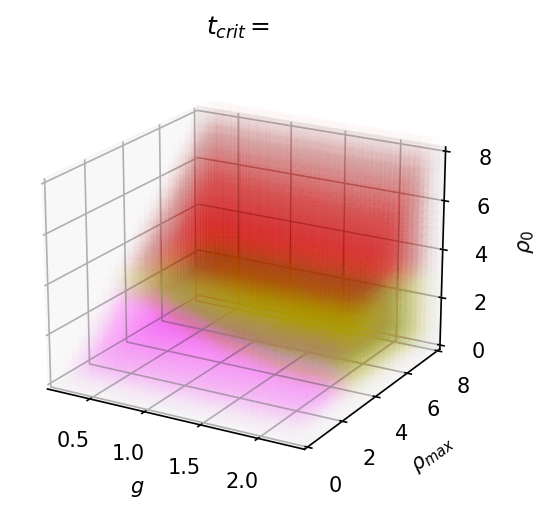

In [38]:
t_crits = []
n_samples = 50

fig, ax = plot_3d_phase_boundaries_lin_nodilution(t_crits, n_samples)

fig_fname = run_name + "_3d_nsamples_{1}".format(
    "_".join([str(i) for i in t_crits]), n_samples
)
fig_path = os.path.join("plots", fig_fname)

print(fig_path)
if save_figs:
    plt.savefig(fig_path, dpi=150)

plots\20210426_sweep_TCphase_dense_ling_nodilution_3d_phase_tcrit_0_nsamples_50


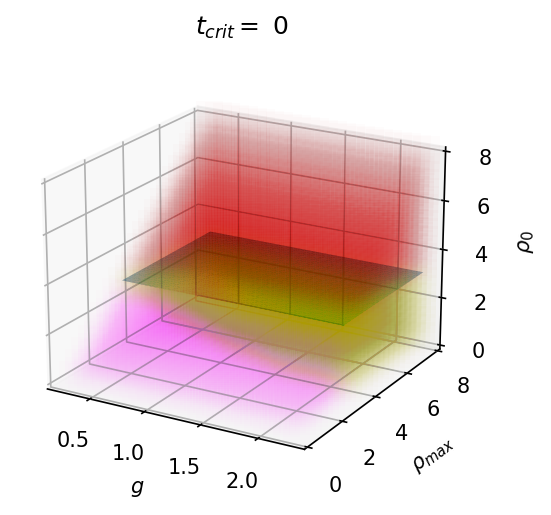

In [39]:
t_crits = [0]
n_samples = 50

fig, ax = plot_3d_phase_boundaries_lin_nodilution(t_crits, n_samples)

fig_fname = run_name + "_3d_phase_tcrit_{0}_nsamples_{1}".format(
    "_".join([str(i) for i in t_crits]), n_samples
)
fig_path = os.path.join("plots", fig_fname)

print(fig_path)
if save_figs:
    plt.savefig(fig_path, dpi=150)

plots\20210426_sweep_TCphase_dense_ling_nodilution_3d_phase_tcrit_1_nsamples_50


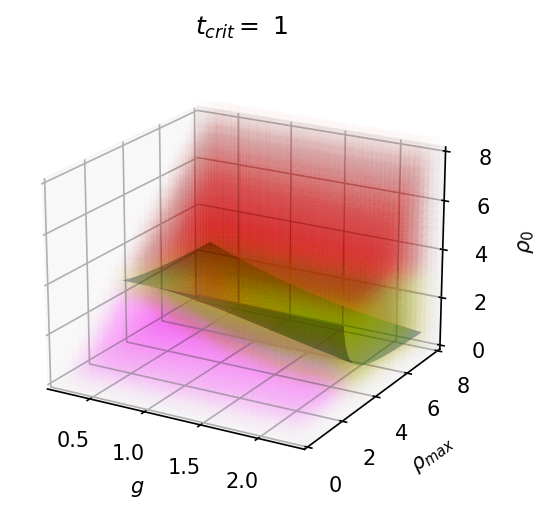

In [40]:
t_crits = [1]
n_samples = 50

fig, ax = plot_3d_phase_boundaries_lin_nodilution(t_crits, n_samples)

fig_fname = run_name + "_3d_phase_tcrit_{0}_nsamples_{1}".format(
    "_".join([str(i) for i in t_crits]), n_samples
)
fig_path = os.path.join("plots", fig_fname)

print(fig_path)
if save_figs:
    plt.savefig(fig_path, dpi=150)

plots\20210426_sweep_TCphase_dense_ling_nodilution_3d_phase_tcrit_10_nsamples_50


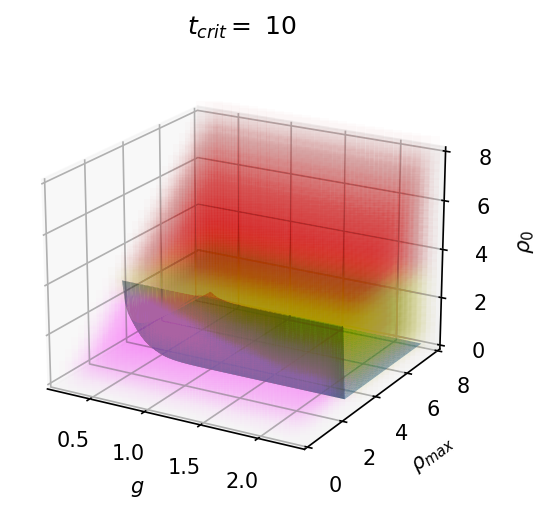

In [41]:
t_crits = [10]
n_samples = 50

fig, ax = plot_3d_phase_boundaries_lin_nodilution(t_crits, n_samples)

fig_fname = run_name + "_3d_phase_tcrit_{0}_nsamples_{1}".format(
    "_".join([str(i) for i in t_crits]), n_samples
)
fig_path = os.path.join("plots", fig_fname)

print(fig_path)
if save_figs:
    plt.savefig(fig_path, dpi=150)

plots\20210426_sweep_TCphase_dense_ling_nodilution_3d_phase_tcrit_1_10_nsamples_50


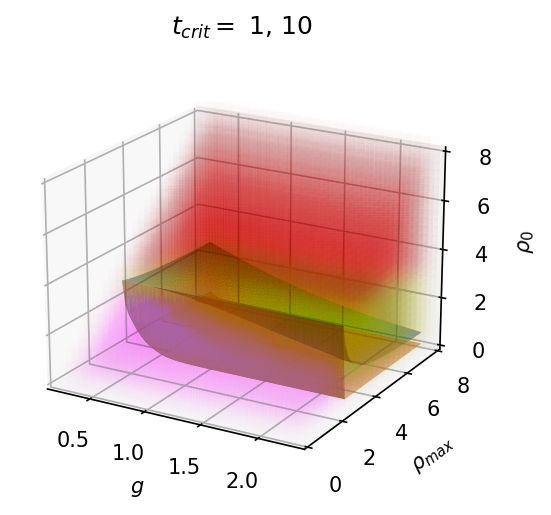

In [42]:
t_crits = [1, 10]
n_samples = 50

fig, ax = plot_3d_phase_boundaries_lin_nodilution(t_crits, n_samples)

fig_fname = run_name + "_3d_phase_tcrit_{0}_nsamples_{1}".format(
    "_".join([str(i) for i in t_crits]), n_samples
)
fig_path = os.path.join("plots", fig_fname)

print(fig_path)
if save_figs:
    plt.savefig(fig_path, dpi=150)

plots\20210426_sweep_TCphase_dense_ling_nodilution_3d_phase_tcrit_0_5_nsamples_50


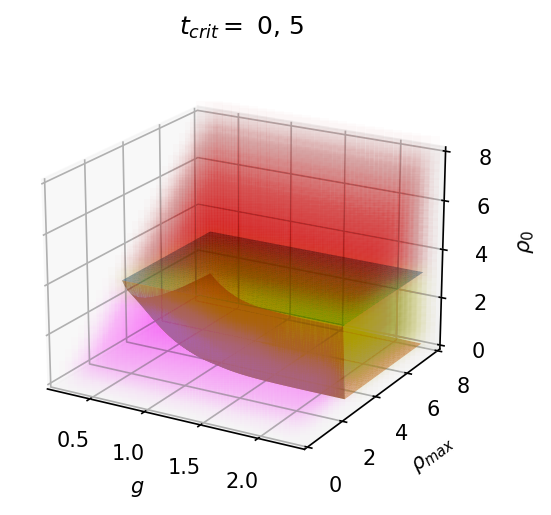

In [43]:
t_crits = [0, 5]
n_samples = 50

fig, ax = plot_3d_phase_boundaries_lin_nodilution(t_crits, n_samples)

fig_fname = run_name + "_3d_phase_tcrit_{0}_nsamples_{1}".format(
    "_".join([str(i) for i in t_crits]), n_samples
)
fig_path = os.path.join("plots", fig_fname)

print(fig_path)
if save_figs:
    plt.savefig(fig_path, dpi=150)

plots\20210426_sweep_TCphase_dense_ling_nodilution_3d_phase_tcrit_0_10_nsamples_50


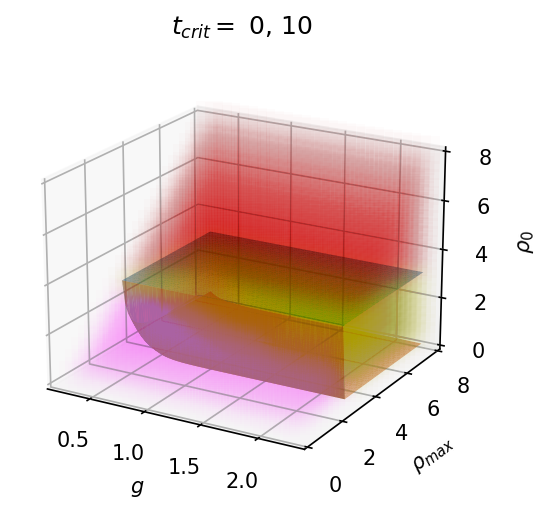

In [44]:
t_crits = [0, 10]
n_samples = 50

fig, ax = plot_3d_phase_boundaries_lin_nodilution(t_crits, n_samples)

fig_fname = run_name + "_3d_phase_tcrit_{0}_nsamples_{1}".format(
    "_".join([str(i) for i in t_crits]), n_samples
)
fig_path = os.path.join("plots", fig_fname)

print(fig_path)
if save_figs:
    plt.savefig(fig_path, dpi=150)

plots\20210426_sweep_TCphase_dense_ling_nodilution_3d_phase_tcrit_0_20_nsamples_50


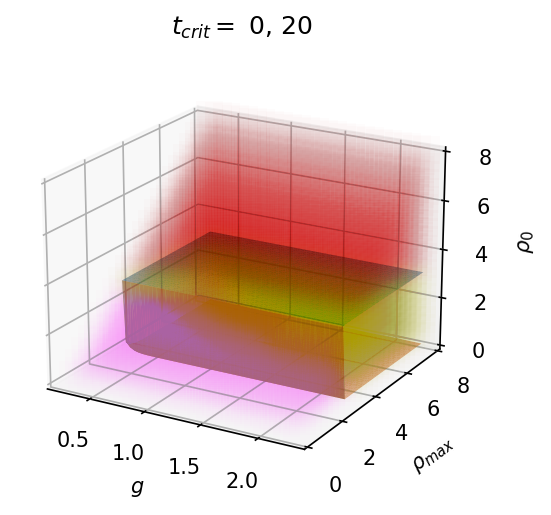

In [45]:
t_crits = [0, 20]
n_samples = 50

fig, ax = plot_3d_phase_boundaries_lin_nodilution(t_crits, n_samples)

fig_fname = run_name + "_3d_phase_tcrit_{0}_nsamples_{1}".format(
    "_".join([str(i) for i in t_crits]), n_samples
)
fig_path = os.path.join("plots", fig_fname)

print(fig_path)
if save_figs:
    plt.savefig(fig_path, dpi=150)

plots\20210426_sweep_TCphase_dense_ling_nodilution_3d_phase_tcrit_0_5_nsamples_50_xz


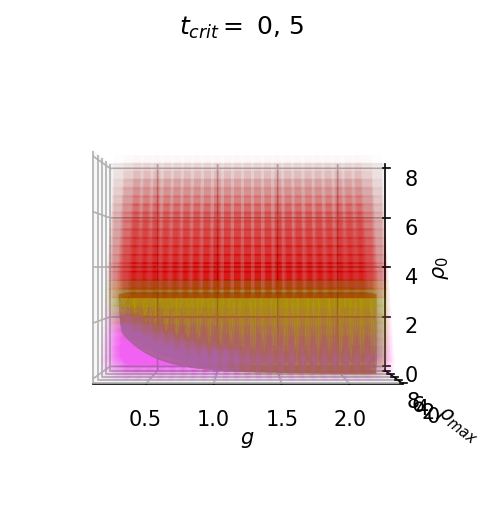

In [46]:
t_crits = [0, 5]
n_samples = 50

fig, ax = plot_3d_phase_boundaries_lin_nodilution(t_crits, n_samples, azim=270, elev=0)

fig_fname = run_name + "_3d_phase_tcrit_{0}_nsamples_{1}_xz".format(
    "_".join([str(i) for i in t_crits]), n_samples
)
fig_path = os.path.join("plots", fig_fname)

print(fig_path)
if save_figs:
    plt.savefig(fig_path, dpi=150)

<hr>

## Plot 2d phase diagram for fixed `g`

In [41]:
g_idx = [3, 9, 15]

plots = []
for gi in g_idx:
    
    g_ = g_space[gi]
    mask = np.logical_and(param_space_agg[:, 0] == g_, which_growing)

    plot = hv.Points(
        (param_space_agg[mask, 1], param_space_agg[mask, 2])
    ).opts(
        title = (r"$g = {0:.2f}$").format(g_),
        xlim = ( 0, 8.5),
        ylim = ( 0, 8.5),
        xlabel = r"$\rho_{0}$",
        xticks = (0, 2, 4, 6, 8),
        ylabel = r"$\rho_{max}$",
        yticks = (0, 2, 4, 6, 8),
    #     marker = "s",
        s=45,
        c=np.array(cc.glasbey_warm)[phase_behavior_new[mask]], 
        cmap="plasma",
    #     logx=True, 
        fontscale=1.5,
        xaxis="top",
        hooks=[remove_RB_spines],
    )
    
#     # Remove right and bottom figure frame-lines
#     fig = hv.render(plot, backend='matplotlib')
#     fig.axes[0].spines["right"].set_visible(False)
#     fig.axes[0].spines["bottom"].set_visible(False)
    
#     axis.spines['right' if self.yaxis == 'left' else 'left'].set_visible(False)
    
    plots.append(plot)

:Points   [x,y]
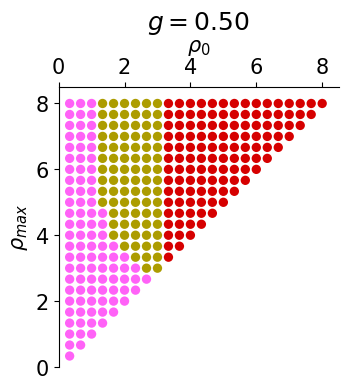

In [42]:
hv.output(plots[0], dpi=100)

:Points   [x,y]
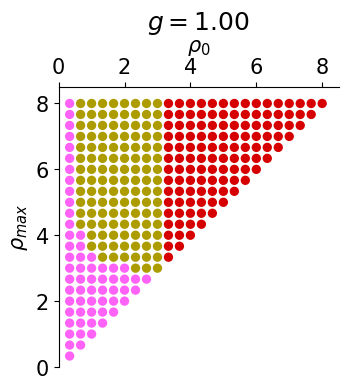

In [43]:
hv.output(plots[1], dpi=100)

:Points   [x,y]
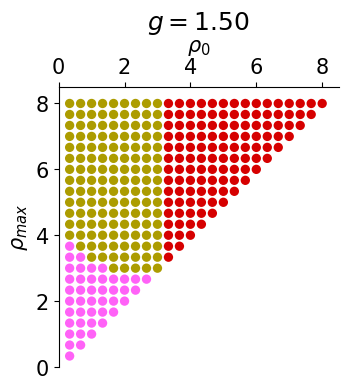

In [44]:
hv.output(plots[2], dpi=100)

In [51]:
# Save plots
# if True:
if save_figs:
    
    # Set filename 
    fname_str = run_name + "_2dphase_g_{0:.2f}"
    
    # Image format
    fmt = "png"
    
    for gi, p_ in zip(g_idx, plots):
        p_fname = fname_str.format(g_space[gi]) + "." + fmt
        p_path = os.path.join("plots", p_fname)
        
        print(p_path)
        
        hv.save(p_, p_path, fmt=fmt, dpi=150)

<hr>

## Plot 2d phase diagram for fixed `g` with `t_crit` boundary

In [69]:
delay = 0.3

In [94]:
g_idx = [3, 9, 15]

plots = []
for gi in g_idx:
    
    g_ = g_space[gi]
    mask = np.logical_and(param_space_agg[:, 0] == g_, which_growing)

    rm_min = np.maximum(rho_crit_approx_nodilution, param_space_agg[mask, 2].min())
    rm_max = param_space_agg[mask, 2].max()
    rm_range = np.linspace(rm_min, rm_max, 100)
    
    # Set a time for reaching critical density
    tcrit = 3
    
    # Get the phase boundary in the rho0-rhomax plane
    rho0_tcls = t_crit_approx_levelset_nodilution(
        tcrit, g_, rm_range, rho_crit_approx_nodilution
    )
    
    plot = hv.Points(
        (param_space_agg[mask, 1], param_space_agg[mask, 2])
    ).opts(
        title = (r"$g = {0:.2f}$, t_crit = ${1:.1f}$").format(g_, tcrit),
        xlim = ( 0, 8.5),
        ylim = ( 0, 8.5),
        xlabel = r"$\rho_{0}$",
        xticks = (0, 2, 4, 6, 8),
        ylabel = r"$\rho_{max}$",
        yticks = (0, 2, 4, 6, 8),
    #     marker = "s",
        s=45,
        c=np.array(cc.glasbey_warm)[phase_behavior_new[mask]], 
        cmap="plasma",
    #     logx=True, 
        fontscale=1.5,
        xaxis="top",
        hooks=[remove_RB_spines],
    ) * hv.Curve(
        (rho0_tcls, rm_range)
    ).opts(
        linestyle="dashed",
        linewidth=3,
        c=cc.glasbey_cool[4]
    )
    
#     # Remove right and bottom figure frame-lines
#     fig = hv.render(plot, backend='matplotlib')
#     fig.axes[0].spines["right"].set_visible(False)
#     fig.axes[0].spines["bottom"].set_visible(False)
    
#     axis.spines['right' if self.yaxis == 'left' else 'left'].set_visible(False)
    
    plots.append(plot)

:Overlay
   .Points.I :Points   [x,y]
   .Curve.I  :Curve   [x]   (y)
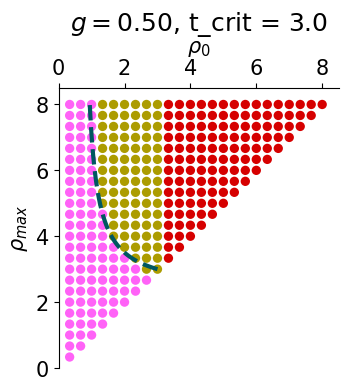

In [96]:
hv.output(plots[0], dpi=100)

:Overlay
   .Points.I :Points   [x,y]
   .Curve.I  :Curve   [x]   (y)
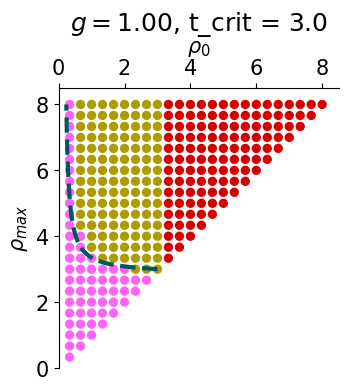

In [97]:
hv.output(plots[1], dpi=100)

:Overlay
   .Points.I :Points   [x,y]
   .Curve.I  :Curve   [x]   (y)
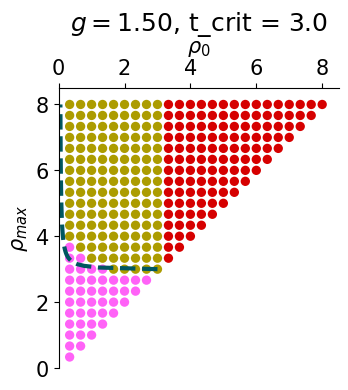

In [98]:
hv.output(plots[2], dpi=100)

In [83]:
# Save plots
# if True:
if save_figs:
    
    # Set filename 
    fname_str = run_name + "_2dphase_g_{0:.2f}_tcrit_{1:.1f}_rhocrit_{2:.1f}"
    
    # Image format
    fmt = "png"
    
    for gi, p_ in zip(g_idx, plots):
        p_fname = fname_str.format(g_space[gi], tcrit, rho_crit_approx_nodilution) + "." + fmt
        p_path = os.path.join("plots", p_fname)
        
        print(p_path)
        
        hv.save(p_, p_path, fmt=fmt, dpi=150)

plots\20210426_sweep_TCphase_dense_ling_nodilution_2dphase_g_0.50_tcrit_3.0_rhocrit_3.0.png
plots\20210426_sweep_TCphase_dense_ling_nodilution_2dphase_g_1.00_tcrit_3.0_rhocrit_3.0.png
plots\20210426_sweep_TCphase_dense_ling_nodilution_2dphase_g_1.50_tcrit_3.0_rhocrit_3.0.png


<hr>

## 2D phase diagram for fixed $\rho_{max}$

In [86]:
# rm_idx = np.array([1, 2, 3, 5, 7]) * 3 + 2

plots = []
for rmi in np.arange(rho_max_space.size):
    
    rm_ = rho_max_space[rmi]
    mask = np.logical_and(param_space_agg[:, 2] == rm_, which_growing)
    
#     gmin = param_space_agg[mask, 0].min()
#     gmax = param_space_agg[mask, 0].max()
#     grange = np.linspace(gmin, gmax, 200)
    
    plot = hv.Points(
        (param_space_agg[mask, 0], param_space_agg[mask, 1])
    ).opts(
        title = r"$\rho$ₘₐₓ = " + "{0:.1f}".format(rm_),
        xlim = ( 0, 2.5),
        ylim = ( 0, 8.5),
        xlabel = r"$g$",
        xticks = (0.5, 1.0, 1.5, 2.0, 2.5),
        ylabel = r"$\rho_0$",
        yticks = (0, 2, 4, 6, 8),
    #     marker = "s",
        s=45,
        c=np.array(cc.glasbey_warm)[phase_behavior_new[mask]], 
        cmap="plasma",
    #     logx=True, 
        fontscale=1.5,
#         xaxis="top",
#         hooks=[remove_RT_spines],
    )
    
#     # Remove right and bottom figure frame-lines
#     fig = hv.render(plot, backend='matplotlib')
#     fig.axes[0].spines["right"].set_visible(False)
#     fig.axes[0].spines["bottom"].set_visible(False)
    
#     axis.spines['right' if self.yaxis == 'left' else 'left'].set_visible(False)
    
    plots.append(plot)

:Layout
   .Points.I     :Points   [x,y]
   .Points.II    :Points   [x,y]
   .Points.III   :Points   [x,y]
   .Points.IV    :Points   [x,y]
   .Points.V     :Points   [x,y]
   .Points.VI    :Points   [x,y]
   .Points.VII   :Points   [x,y]
   .Points.VIII  :Points   [x,y]
   .Points.IX    :Points   [x,y]
   .Points.X     :Points   [x,y]
   .Points.XI    :Points   [x,y]
   .Points.XII   :Points   [x,y]
   .Points.XIII  :Points   [x,y]
   .Points.XIV   :Points   [x,y]
   .Points.XV    :Points   [x,y]
   .Points.XVI   :Points   [x,y]
   .Points.XVII  :Points   [x,y]
   .Points.XVIII :Points   [x,y]
   .Points.XIX   :Points   [x,y]
   .Points.XX    :Points   [x,y]
   .Points.XXI   :Points   [x,y]
   .Points.XXII  :Points   [x,y]
   .Points.XXIII :Points   [x,y]
   .Points.XXIV  :Points   [x,y]
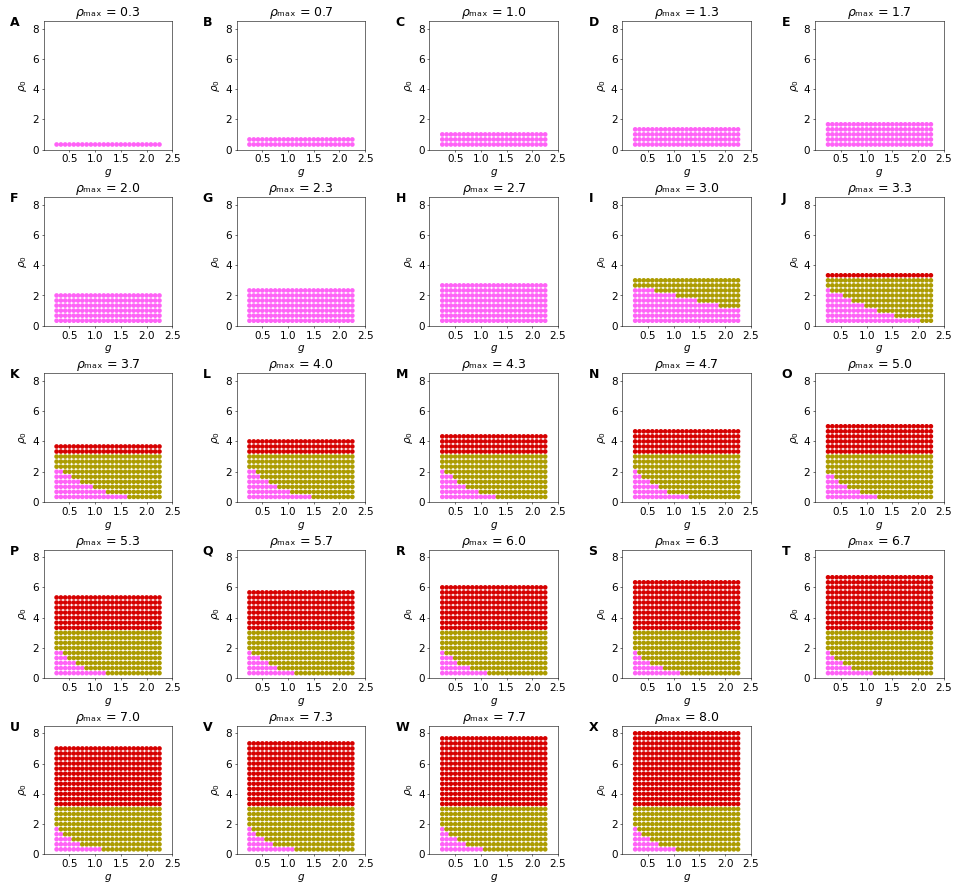

In [87]:
hv.output(hv.Layout(plots).cols(5), dpi=50)

In [134]:
# rm_idx = np.array([1, 2, 3, 5, 7]) * 3 + 2
rm_idx = np.array([5, 11, 17, 7, 8, 9])

plots = []
for rmi in rm_idx:
    
    rm_ = rho_max_space[rmi]
    mask = np.logical_and(param_space_agg[:, 2] == rm_, which_growing)
    
#     gmin = param_space_agg[mask, 0].min()
#     gmax = param_space_agg[mask, 0].max()
#     grange = np.linspace(gmin, gmax, 200)
    
    plot = hv.Points(
        (param_space_agg[mask, 0], param_space_agg[mask, 1])
    ).opts(
        title = r"$\rho$ₘₐₓ = " + "{0:.1f}".format(rm_),
        xlim = ( 0, 2.5),
        ylim = ( 0, 8.5),
        xlabel = r"$g$",
        xticks = (0.5, 1.0, 1.5, 2.0, 2.5),
        ylabel = r"$\rho_0$",
        yticks = (0, 2, 4, 6, 8),
    #     marker = "s",
        s=45,
        c=np.array(cc.glasbey_warm)[phase_behavior_new[mask]], 
        cmap="plasma",
    #     logx=True, 
        fontscale=1.5,
#         xaxis="top",
        hooks=[remove_RT_spines],
    )
    
#     # Remove right and bottom figure frame-lines
#     fig = hv.render(plot, backend='matplotlib')
#     fig.axes[0].spines["right"].set_visible(False)
#     fig.axes[0].spines["bottom"].set_visible(False)
    
#     axis.spines['right' if self.yaxis == 'left' else 'left'].set_visible(False)
    
    plots.append(plot)

:Layout
   .Points.I   :Points   [x,y]
   .Points.II  :Points   [x,y]
   .Points.III :Points   [x,y]
   .Points.IV  :Points   [x,y]
   .Points.V   :Points   [x,y]
   .Points.VI  :Points   [x,y]
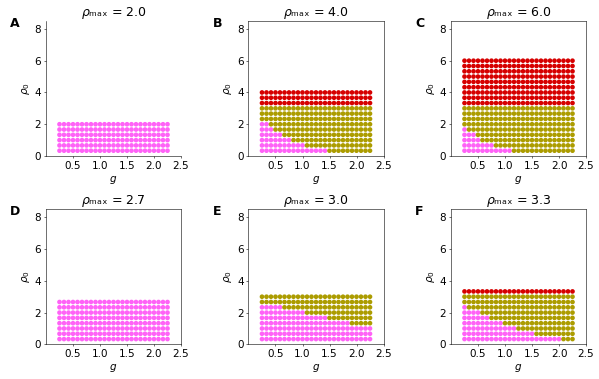

In [135]:
hv.output(hv.Layout(plots).cols(3), dpi=50)

In [95]:
# Save plots
# if True:
if save_figs:
    
    # Set filename 
    fname_str = run_name + "_2dphase_fixrhomax_{0:.2f}"
    
    # Image format
    fmt = "png"
    
    for rmi, p_ in zip(rm_idx, plots):
        p_fname = fname_str.format(rho_max_space[rmi]) + "." + fmt
        p_path = os.path.join("plots", p_fname)
        
        print(p_path)
        
        hv.save(p_, p_path, fmt=fmt, dpi=150)

plots\20210426_sweep_TCphase_dense_ling_nodilution_2dphase_fixrhomax_2.00.png
plots\20210426_sweep_TCphase_dense_ling_nodilution_2dphase_fixrhomax_4.00.png
plots\20210426_sweep_TCphase_dense_ling_nodilution_2dphase_fixrhomax_6.00.png
plots\20210426_sweep_TCphase_dense_ling_nodilution_2dphase_fixrhomax_2.67.png
plots\20210426_sweep_TCphase_dense_ling_nodilution_2dphase_fixrhomax_3.00.png
plots\20210426_sweep_TCphase_dense_ling_nodilution_2dphase_fixrhomax_3.33.png


<hr>

## 2D plot of max activated area for fixed $\rho_\text{max}$

In [175]:
# Total area of well
# total_area = 3.2e7  # um^2 
total_area = 32     # mm^2 


In [176]:
max_act_num = S_actnum_mean.max(axis=1) 

max_act_prop = max_act_num / n 
max_act_area = max_act_prop * total_area 

In [184]:
# rm_idx = np.array([1, 2, 3, 5, 7]) * 3 + 2

plots = []
for rmi in np.arange(rho_max_space.size):
    
    rm_ = rho_max_space[rmi]
    mask = np.logical_and(param_space_agg[:, 2] == rm_, which_growing)
    
    g_min = param_space_agg[mask, 0].min()
    g_max = param_space_agg[mask, 0].max()
    g_range = np.linspace(g_min, g_max, 100)
    
    # Set a time for reaching critical density
    tcrit = 3
    
    # Get the phase boundary in the rho0-rhomax plane
    rho0_tcls = t_crit_approx_levelset_nodilution(
        tcrit, g_range, rm_, rho_crit_approx_nodilution
    )
    
    data = {
        "g": param_space_agg[mask, 0], 
        "rho_0": param_space_agg[mask, 1],
        "area": max_act_area[mask],
    }
    
    plot = hv.Points(
        data,
        kdims=["g", "rho_0"],
        vdims=["area"],
    ).opts(
        title = r"$\rho$ₘₐₓ = " + "{0:.1f}".format(rm_),
        xlim = ( 0, 2.5),
        ylim = ( 0, 8.5),
        xlabel = r"$g$",
        xticks = (0.5, 1.0, 1.5, 2.0, 2.5),
        ylabel = r"$\rho_0$",
        yticks = (0, 2, 4, 6, 8),
#         marker = "s",
        s=45,
#         c=np.array(cc.glasbey_warm)[phase_behavior_new[mask]], 
        color="area",
        clabel=r"area $(mm^2)$",
        cmap="viridis",
        colorbar=True,
        fontscale=1.5,
#         hooks=[remove_RT_spines],
    ).redim.range(
        **{"area": (0, total_area)}
    ) * hv.Curve(
        (g_range, rho0_tcls)
    ).opts(
        linestyle="dashed",
        linewidth=3,
        c=cc.glasbey_cool[4]
    )
    
    plots.append(plot)

:Layout
   .Overlay.I     :Overlay
      .Points.I :Points   [g,rho_0]   (area)
      .Curve.I  :Curve   [x]   (y)
   .Overlay.II    :Overlay
      .Points.I :Points   [g,rho_0]   (area)
      .Curve.I  :Curve   [x]   (y)
   .Overlay.III   :Overlay
      .Points.I :Points   [g,rho_0]   (area)
      .Curve.I  :Curve   [x]   (y)
   .Overlay.IV    :Overlay
      .Points.I :Points   [g,rho_0]   (area)
      .Curve.I  :Curve   [x]   (y)
   .Overlay.V     :Overlay
      .Points.I :Points   [g,rho_0]   (area)
      .Curve.I  :Curve   [x]   (y)
   .Overlay.VI    :Overlay
      .Points.I :Points   [g,rho_0]   (area)
      .Curve.I  :Curve   [x]   (y)
   .Overlay.VII   :Overlay
      .Points.I :Points   [g,rho_0]   (area)
      .Curve.I  :Curve   [x]   (y)
   .Overlay.VIII  :Overlay
      .Points.I :Points   [g,rho_0]   (area)
      .Curve.I  :Curve   [x]   (y)
   .Overlay.IX    :Overlay
      .Points.I :Points   [g,rho_0]   (area)
      .Curve.I  :Curve   [x]   (y)
   .Overlay.X     :Overlay
      .Points.I :Points   [g,rho_0]   (area)
      .Curve.I  :Curve   [x]   (y)
   .Overlay.XI    :Overlay
      .Points.I :Points   [g,rho_0]   (area)
      .Curve.I  :Curve   [x]   (y)
   .Overlay.XII   :Overlay
      .Points.I :Points   [g,rho_0]   (area)
      .Curve.I  :Curve   [x]   (y)
   .Overlay.XIII  :Overlay
      .Points.I :Points   [g,rho_0]   (area)
      .Curve.I  :Curve   [x]   (y)
   .Overlay.XIV   :Overlay
      .Points.I :Points   [g,rho_0]   (area)
      .Curve.I  :Curve   [x]   (y)
   .Overlay.XV    :Overlay
      .Points.I :Points   [g,rho_0]   (area)
      .Curve.I  :Curve   [x]   (y)
   .Overlay.XVI   :Overlay
      .Points.I :Points   [g,rho_0]   (area)
      .Curve.I  :Curve   [x]   (y)
   .Overlay.XVII  :Overlay
      .Points.I :Points   [g,rho_0]   (area)
      .Curve.I  :Curve   [x]   (y)
   .Overlay.XVIII :Overlay
      .Points.I :Points   [g,rho_0]   (area)
      .Curve.I  :Curve   [x]   (y)
   .Overlay.XIX   :Overlay
      .Points.I :Points   [g,rho_0]   (area)
      .Curve.I  :Curve   [x]   (y)
   .Overlay.XX    :Overlay
      .Points.I :Points   [g,rho_0]   (area)
      .Curve.I  :Curve   [x]   (y)
   .Overlay.XXI   :Overlay
      .Points.I :Points   [g,rho_0]   (area)
      .Curve.I  :Curve   [x]   (y)
   .Overlay.XXII  :Overlay
      .Points.I :Points   [g,rho_0]   (area)
      .Curve.I  :Curve   [x]   (y)
   .Overlay.XXIII :Overlay
      .Points.I :Points   [g,rho_0]   (area)
      .Curve.I  :Curve   [x]   (y)
   .Overlay.XXIV  :Overlay
      .Points.I :Points   [g,rho_0]   (area)
      .Curve.I  :Curve   [x]   (y)
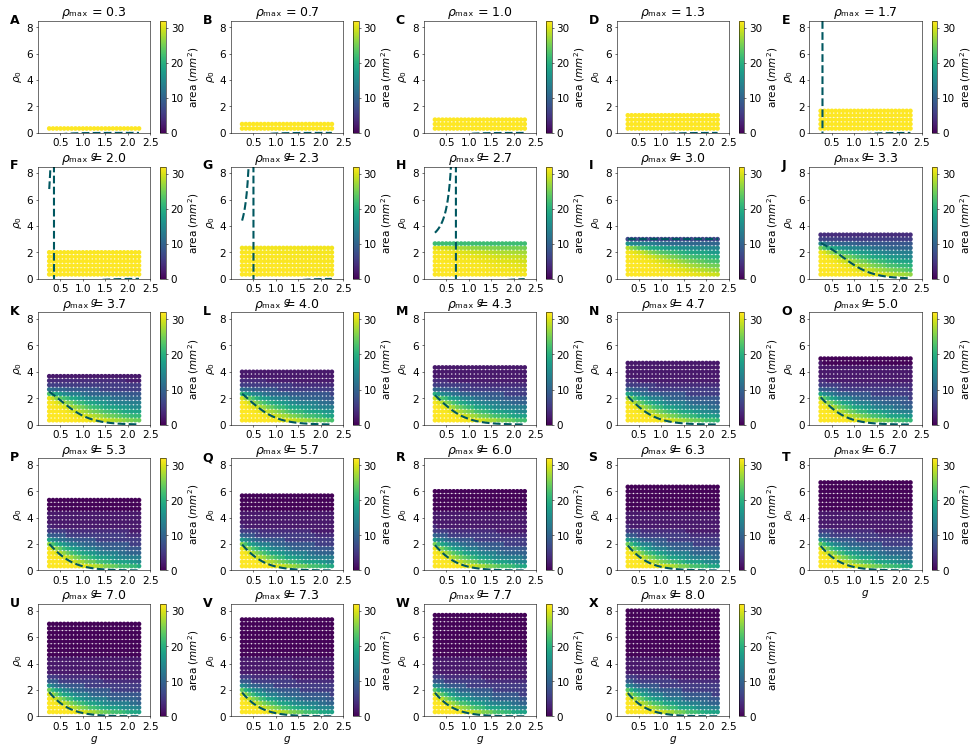

In [185]:
hv.output(hv.Layout(plots).cols(5), dpi=50)

In [168]:
rm_idx = np.array([5, 11, 17, 7, 8, 9])

plots = []
for rmi in rm_idx:
    
    rm_ = rho_max_space[rmi]
    mask = np.logical_and(param_space_agg[:, 2] == rm_, which_growing)
    
    data = {
        "g": param_space_agg[mask, 0], 
        "rho_0": param_space_agg[mask, 1],
        "area": max_act_area[mask],
    }
    
    g_min = param_space_agg[mask, 0].min()
    g_max = param_space_agg[mask, 0].max()
    g_range = np.linspace(g_min, g_max, 100)
    
    # Set a time for reaching critical density
    tcrit = 3
    
    # Get the phase boundary in the rho0-rhomax plane
    rho0_tcls = t_crit_approx_levelset_nodilution(
        tcrit, g_range, rm_, rho_crit_approx_nodilution
    )
    
    plot = hv.Points(
        data,
        kdims=["g", "rho_0"],
        vdims=["area"],
    ).opts(
        title = r"$\rho$ₘₐₓ = " + "{0:.1f}".format(rm_),
        xlim = ( 0, 2.5),
        ylim = ( 0, 8.5),
        xlabel = r"$g$",
        xticks = (0.5, 1.0, 1.5, 2.0, 2.5),
        ylabel = r"$\rho_0$",
        yticks = (0, 2, 4, 6, 8),
    #     marker = "s",
        s=45,
        color="area",
        clabel=r"area $(mm^2)$",
        cmap="viridis",
        colorbar=True,
    #     logx=True, 
        fontscale=1.5,
#         xaxis="top",
        hooks=[remove_RT_spines],
    ).redim.range(
        **{"area": (0, total_area)}
    ) * hv.Curve(
        (rho0_tcls, rm_range)
    ).opts(
        linestyle="dashed",
        linewidth=3,
        c=cc.glasbey_cool[4]
    )
    
    
    plots.append(plot)

:Layout
   .Points.I   :Points   [g,rho_0]   (area)
   .Points.II  :Points   [g,rho_0]   (area)
   .Points.III :Points   [g,rho_0]   (area)
   .Points.IV  :Points   [g,rho_0]   (area)
   .Points.V   :Points   [g,rho_0]   (area)
   .Points.VI  :Points   [g,rho_0]   (area)
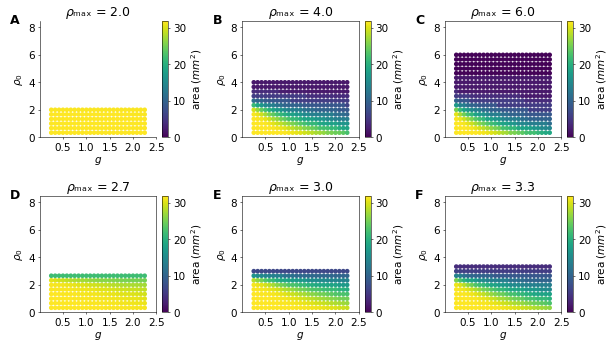

In [169]:
hv.output(hv.Layout(plots).opts(hspace=0.5, vspace=0.5).cols(3), dpi=50)

In [170]:
# Save plots
# if True:
if save_figs:
    
    # Set filename 
    fname_str = run_name + "_maxarea_fixrhomax_{0:.2f}"
    
    # Image format
    fmt = "png"
    
    for rmi, p_ in zip(rm_idx, plots):
        p_fname = fname_str.format(rho_max_space[rmi]) + "." + fmt
        p_path = os.path.join("plots", p_fname)
        
        print(p_path)
        
        hv.save(p_, p_path, fmt=fmt, dpi=150)

plots\20210426_sweep_TCphase_dense_ling_nodilution_maxarea_fixrhomax_2.00.png
plots\20210426_sweep_TCphase_dense_ling_nodilution_maxarea_fixrhomax_4.00.png
plots\20210426_sweep_TCphase_dense_ling_nodilution_maxarea_fixrhomax_6.00.png
plots\20210426_sweep_TCphase_dense_ling_nodilution_maxarea_fixrhomax_2.67.png
plots\20210426_sweep_TCphase_dense_ling_nodilution_maxarea_fixrhomax_3.00.png
plots\20210426_sweep_TCphase_dense_ling_nodilution_maxarea_fixrhomax_3.33.png


<hr>

## 2D phase diagram for fixed $\rho_{max}$ with $t_\text{crit}$

In [242]:
delay = 0.3

In [252]:
rm_idx = np.array([1, 2, 3, 5, 7]) * 3 + 2

plots = []
for rmi in rm_idx:
    
    rm_ = rho_max_space[rmi]
    mask = np.logical_and(param_space_agg[:, 2] == rm_, which_growing)
    
    gmin = param_space_agg[mask, 0].min()
    gmax = param_space_agg[mask, 0].max()
    grange = np.linspace(gmin, gmax, 300)
    
    rho0_tcls_0 = t_crit_approx_levelset_nodilution(
        0, grange, rm_, 19/6
    )
    rho0_tcls = t_crit_approx_levelset_nodilution(
        5, grange, rm_, 19/6
    )
    
    plot = hv.Points(
        (param_space_agg[mask, 0], param_space_agg[mask, 1])
    ).opts(
        title = r"$\rho$ₘₐₓ = " + "{0:.1f}".format(rm_),
        xlim = ( 0, 2.5),
        ylim = ( 0, 8.5),
        xlabel = r"$g$",
        xticks = (0.5, 1.0, 1.5, 2.0, 2.5),
        ylabel = r"$\rho_0$",
        yticks = (0, 2, 4, 6, 8),
    #     marker = "s",
        s=45,
        c=np.array(cc.glasbey_warm)[phase_behavior_new[mask]], 
        cmap="plasma",
    #     logx=True, 
        fontscale=1.5,
#         xaxis="top",
#         hooks=[remove_RT_spines],
    ) * hv.Curve(
        (grange, rho0_tcls_0)
    ).opts(
        linestyle="dashed",
        linewidth=3,
    ) * hv.Curve(
        (grange, rho0_tcls)
    ).opts(
        linestyle="dashed",
        linewidth=3,
    )
    
#     # Remove right and bottom figure frame-lines
#     fig = hv.render(plot, backend='matplotlib')
#     fig.axes[0].spines["right"].set_visible(False)
#     fig.axes[0].spines["bottom"].set_visible(False)
    
#     axis.spines['right' if self.yaxis == 'left' else 'left'].set_visible(False)
    
    plots.append(plot)

:Layout
   .Overlay.I   :Overlay
      .Points.I :Points   [x,y]
      .Curve.I  :Curve   [x]   (y)
      .Curve.II :Curve   [x]   (y)
   .Overlay.II  :Overlay
      .Points.I :Points   [x,y]
      .Curve.I  :Curve   [x]   (y)
      .Curve.II :Curve   [x]   (y)
   .Overlay.III :Overlay
      .Points.I :Points   [x,y]
      .Curve.I  :Curve   [x]   (y)
      .Curve.II :Curve   [x]   (y)
   .Overlay.IV  :Overlay
      .Points.I :Points   [x,y]
      .Curve.I  :Curve   [x]   (y)
      .Curve.II :Curve   [x]   (y)
   .Overlay.V   :Overlay
      .Points.I :Points   [x,y]
      .Curve.I  :Curve   [x]   (y)
      .Curve.II :Curve   [x]   (y)
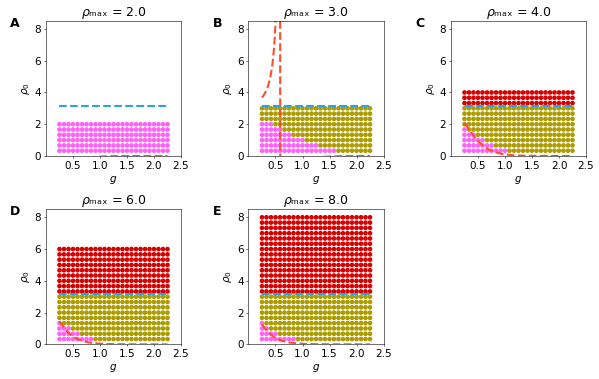

In [253]:
hv.output(hv.Layout(plots).cols(3), dpi=50)

:Overlay
   .Points.I :Points   [x,y]
   .Curve.I  :Curve   [x]   (y)
   .Curve.II :Curve   [x]   (y)
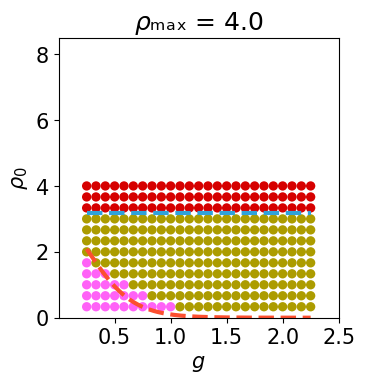

In [254]:
hv.output(plots[2], dpi=100)

<hr>

## Diagrams with activated area

- Calculate max activated area for each sample
- Plot phase diagram colored by area
- Limits on colorscale should be 0 to full activation

In [ ]:
def max_area

# Testing 3D scatter-plots

In [ ]:
# hv.Scatter3D(
#     param_space_3d[which_growing][:, np.array([0, 2, 1])]
# ).opts(
#     c=phase_behavior[which_growing],
#     linewidth=0,
#     s=200,
#     alpha=0.02,
# #     marker="s",
# )

<hr>

In [ ]:
# def crit_g_curve(rho_0, rho_range):
    
#     return hv.Curve(
#         (np.array([crit_g_approx(rho_0)] * rho_range.size), rho_range, )
#     ).opts(
#         c=cc.CET_L8[100],
#         linewidth=4,
#         linestyle="dashed",
#     )

In [ ]:
# rho_range = np.linspace(1, 8, 100)

# nplots = rho_0_space.size
# phase_fit_plots = []
# for i in range(nplots):
#     mask = param_space_agg[:, 1] == rho_0_space[i]
#     plot = hv.Points(
#         (param_space_agg[mask, 0], param_space_agg[mask, 2])
#     ).opts(
#         title = r"$\rho_0$ = " + f"{rho_0_space[i]:.2f}",
#         xlim = (0.1, 10),
#         ylim = (  1,  8),
#         xlabel = r"$g$",
#         ylabel = r"$\rho_{max}$",
#         yticks = (1, 2, 4, 6, 8),
#         marker = "s",
#         s=100,
#         c=np.array(cc.glasbey_cool)[phase_behavior[mask]], 
#         cmap="plasma",
#         logx=True, 
#         aspect=2.5,
#         fontscale=1.5,
#     )    
    
#     phase_fit_plots.append(plot * crit_g_curve(rho_0_space[i], rho_range) * fit_curve)


In [ ]:
# hv.Layout(phase_fit_plots[2:13:3]).cols(2).opts(title=f"Phase behavior")

In [ ]:
# nplots = rho_0_space.size
# prop_plots = []
# for i in range(nplots):
#     mask = param_space_agg[:, 1] == rho_0_space[i]
#     plot = hv.Points(
#         (param_space_agg[mask, 0], param_space_agg[mask, 2])
#     ).opts(
#         title = r"$\rho_0$ = " + f"{rho_0_space[i]:.2f}",
#         xlim = (0.1, 10),
#         ylim = (  1,  8),
#         xlabel = r"$g$",
#         ylabel = r"$\rho_{max}$",
#         yticks = (1, 2, 4, 6, 8),
#         marker = "s",
#         s=70,
#         c=S_prop_pct[mask], 
#         cmap="cet_isoluminant_cgo_80_c38",
#         logx=True, 
#         aspect=2.5,
#         fontscale=1.5,
#     )
    
#     prop_plots.append(plot)
    

In [ ]:
# hv.Layout(prop_plots[2::6]).cols(4).opts(title=f"Propagation index (% replicates propagated)")

In [ ]:
# nplots = rho_0_space.size
# phase_plots = []
# for i in range(nplots):
#     mask = param_space_agg[:, 1] == rho_0_space[i]
#     plot = hv.Points(
#         (param_space_agg[mask, 0], param_space_agg[mask, 2])
#     ).opts(
#         title = r"$\rho_0$ = " + f"{rho_0_space[i]:.2f}",
#         xlim = (0.1, 10),
#         ylim = (  1,  8),
#         xlabel = r"$g$",
#         ylabel = r"$\rho_{max}$",
#         yticks = (1, 2, 4, 6, 8),
#         marker = "s",
#         s=70,
#         c=np.array(cc.glasbey_cool)[phase_behavior[mask]], 
#         cmap="plasma",
#         logx=True, 
#         aspect=2.5,
#         fontscale=1.5,
#     )
    
#     phase_plots.append(plot)
    

In [ ]:
# hv.Layout(phase_plots[2::3]).cols(4).opts(title=f"Phase behavior")